Parameters: [ 1.36657705 -2.97811368 -0.69775693]
RMSE: 0.09307608173064318
R-squared: 0.9960108478495359



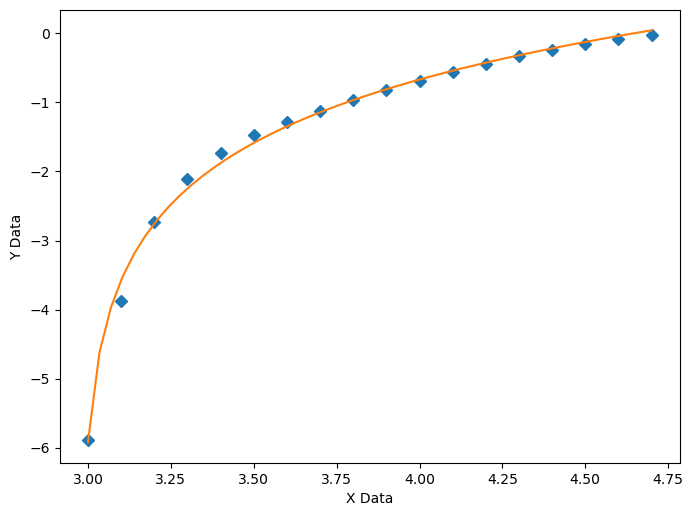

In [3]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ignore any "invalid value in log" warnings internal to curve_fit() routine
import warnings
# warnings.filterwarnings("ignore")

X=[3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7]
Y=[-5.890486683, -3.87063815, -2.733484754, -2.104972457, -1.728190699, -1.477976987, -1.285589215, -1.120224363, -0.968576581, -0.82492453, -0.688457731, -0.559780327, -0.440437932, -0.331886009, -0.235162505, -0.150572236, -0.078157925, -0.01718885]

# alias data to match previous example
xData = numpy.array(X, dtype=float)
yData = numpy.array(Y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# # these are the same as the scipy defaults
# initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData)#, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)